In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import sys


In [14]:
df_season1516=pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/Datasets/DatasetFifSix.csv')
df_season1516_Championship=pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/Datasets/DatasetFifSixChampionship.csv')
df_season1617=pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/Datasets/DatasetSixSeven.csv')
df_season1617_Championship=pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/Datasets/DatasetSixSevenChampionship.csv')
df_season1718=pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/Datasets/DatasetSevenEight.csv')

In [16]:
df_season1516_Championship.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH',
       'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
       'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD',
       'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA',
       'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

In [24]:
df_rangers_home= df_season1516_Championship[df_season1516_Championship['HomeTeam']=='Rangers']
df_rangers_away= df_season1516_Championship[df_season1516_Championship['AwayTeam']=='Rangers']
df_hibernian_home= df_season1617_Championship[df_season1617_Championship['HomeTeam']=='Hibernian']
df_hibernian_away= df_season1617_Championship[df_season1617_Championship['AwayTeam']=='Hibernian']

df_season1516_Championship = pd.concat([df_rangers_home, df_rangers_away], axis=0 )
df_season1617_Championship = pd.concat([df_hibernian_home, df_hibernian_away])

In [26]:
df_season1516= pd.concat([df_season1516,df_season1516_Championship], axis=0)
df_season1617= pd.concat([df_season1617,df_season1617_Championship], axis=0)

In [28]:
teams_s1516 = df_season1516.columns.unique()

In [29]:
teams_s1516.shape

(65,)

In [30]:
teams_s1617 = df_season1617.columns.unique()

In [31]:
teams_s1617.shape

(65,)

In [32]:
teams_s1718 = df_season1718.columns.unique()

In [33]:
teams_s1718.shape

(65,)

In [34]:
same_columns1 = np.intersect1d(teams_s1516, teams_s1617)

In [35]:
same_columns = np.intersect1d(same_columns1, teams_s1718)

In [36]:
df_season1516 = df_season1516[same_columns]
df_season1617 = df_season1617[same_columns]
df_season1718 = df_season1718[same_columns]

In [37]:
df_all_seasons = pd.concat([df_season1516, df_season1617, df_season1718], axis=0)

In [38]:
df_all_seasons['Date'] = pd.to_datetime(df_all_seasons['Date'], errors='coerce')

In [39]:
df_all_seasons['Day'] = df_all_seasons['Date'].dt.day
df_all_seasons['Month'] = df_all_seasons['Date'].dt.month
df_all_seasons['Year'] = df_all_seasons['Date'].dt.year

In [40]:
df_all_seasons_principles = df_all_seasons[['Day','Month','Year','HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HST', 'AST']]

In [41]:
df_all_seasons_principles['HTGDIFF'] = df_all_seasons_principles['FTHG'] - df_all_seasons_principles['FTAG']
df_all_seasons_principles['ATGDIFF'] = df_all_seasons_principles['FTAG'] - df_all_seasons_principles['FTHG']

In [42]:
df_all_seasons_principles.head()

,Day,Month,Year,HomeTeam,AwayTeam,FTHG,FTAG,HST,AST,HTGDIFF,ATGDIFF
0,8,1,2015,Celtic,Ross County,2,0,7.0,4.0,2,-2
1,8,1,2015,Hamilton,Partick,0,0,7.0,3.0,0,0
2,8,1,2015,Inverness C,Motherwell,0,1,0.0,8.0,-1,1
3,8,1,2015,Kilmarnock,Dundee,0,4,1.0,10.0,-4,4
4,8,2,2015,Dundee United,Aberdeen,0,1,3.0,3.0,-1,1


In [43]:
df_all_seasons_principles= df_all_seasons_principles.sort_values(['Year', 'Month','Day'], ascending=False)

In [44]:
df_all_seasons_principles.groupby('HomeTeam').count()

,Day,Month,Year,AwayTeam,FTHG,FTAG,HST,AST,HTGDIFF,ATGDIFF
HomeTeam,,,,,,,,,,
Aberdeen,57,57,57,57,57,57,57,57,57,57
Alloa,4,4,4,4,4,4,0,0,4,4
Ayr,2,2,2,2,2,2,0,0,2,2
Celtic,57,57,57,57,57,57,57,57,57,57
Dumbarton,6,6,6,6,6,6,0,0,6,6
Dundee,57,57,57,57,57,57,57,57,57,57
Dundee United,21,21,21,21,21,21,19,19,21,21
Dunfermline,2,2,2,2,2,2,0,0,2,2
Falkirk,6,6,6,6,6,6,0,0,6,6


In [45]:
from pandas.plotting import scatter_matrix

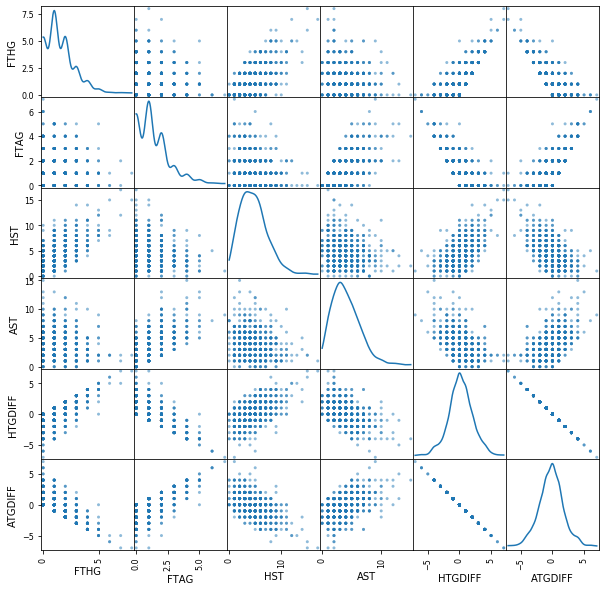

In [46]:
scatter_matrix(df_all_seasons_principles[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HST', 'AST', 'HTGDIFF', 'ATGDIFF']], diagonal='kde', figsize=(10,10));

In [47]:
df_all_seasons_principles[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HST', 'AST', 'HTGDIFF', 'ATGDIFF']].describe()

,FTHG,FTAG,HST,AST,HTGDIFF,ATGDIFF
count,792.000000,792.000000,684.000000,684.000000,792.000000,792.000000
mean,1.489899,1.287879,4.666667,3.988304,0.202020,-0.202020
std,1.290792,1.232905,2.615418,2.341899,1.900721,1.900721
min,0.000000,0.000000,0.000000,0.000000,-7.000000,-7.000000
25%,1.000000,0.000000,3.000000,2.000000,-1.000000,-1.000000
50%,1.000000,1.000000,4.000000,4.000000,0.000000,0.000000
75%,2.000000,2.000000,6.000000,5.000000,1.000000,1.000000
max,8.000000,7.000000,17.000000,15.000000,7.000000,7.000000


In [48]:
import pickle
df_all_seasons_principles.to_pickle('df_all_seasons_principles')